In [3]:
# Visualizing mlst results - frequency bar plot of most representatives STs in R
library(ggplot2)
data <- read.table("data/just_STs_W_header_R.txt", header = TRUE)
head(data)

,Count,Sequence_Type
,<int>,<chr>
1,91,Unclassified
2,50,ST_1
3,237,ST_5
4,15,ST_6
5,12,ST_7
6,318,ST_8


In [4]:
## Pre-processing 
filtered_data <- subset(data, Count > 10) # Filter the data to include only counts greater than 10
others_data <- data.frame(Count = sum(data$Count[data$Count <= 10]),
                          Sequence_Type = "Others") # Filter the data to include only counts greater than 10

combined_data <- rbind(filtered_data, others_data) # Combine the filtered data and 'Others' data


In [5]:
## Create a custom color palette
my_colors <- c("Others" = "black", "Unclassified" = "#303030")

unique_types <- unique(filtered_data$Sequence_Type)
for (st in unique_types) {
    my_colors <- c(my_colors, setNames("gray", st))
} 


In [7]:
## Reorder Sequence_Type by Count in ascending order
combined_data$Sequence_Type <- reorder(combined_data$Sequence_Type, combined_data$Count)
head(combined_data)

,Count,Sequence_Type
,<int>,<fct>
1,91,Unclassified
2,50,ST_1
3,237,ST_5
4,15,ST_6
5,12,ST_7
6,318,ST_8


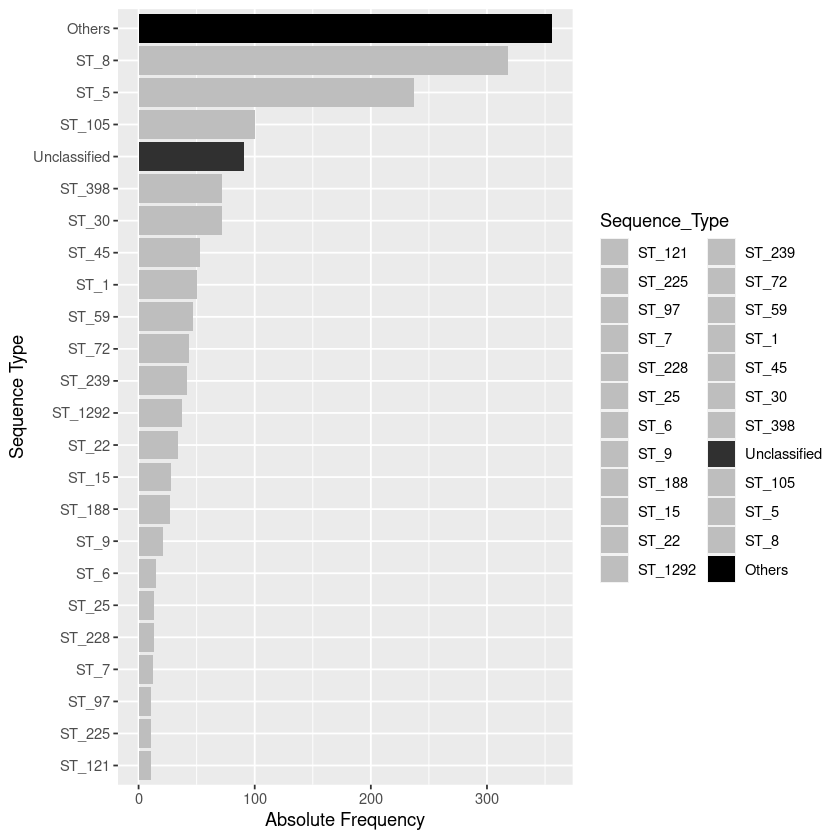

In [8]:
## Create the barplot with different fill colors
ggplot(combined_data, aes(x = Count, y = Sequence_Type, fill = Sequence_Type)) +
    geom_bar(stat = "identity") +
    labs(x = "Absolute Frequency", y = "Sequence Type") +
    scale_fill_manual(values = my_colors)
